## Set up

In [141]:
%matplotlib notebook

In [142]:
from qa import metrics, plots
from orca.metadata import pathsmanagers
from datetime import datetime, date
import os.path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import casatools
from collections import Counter
from functools import reduce
from astropy.io import fits
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [131]:
tb = casatools.table()

## Find data and calibration files

In [132]:
%cd /lustre/mmanders/exoplanet

/lustre/mmanders/exoplanet


In [133]:
%ls

BCAL/  channelfits/  dynspec/  processing/  RFIsprint/


In [238]:
user = 'mmanders'
spws = list(range(2, 8))
lst0_quiet = 7
lst1_quiet = 12

## First 2019 campaign

In [239]:
pm_20191121 = pathsmanagers.OfflinePathsManager(
                  utc_times_txt_path='/lustre/data/2019-11-21_rainydata/utc_times.txt',
                  dadafile_dir='/lustre/data/2019-11-21_rainydata',
                  working_dir=f'/lustre/{user}/exoplanet/processing',
                  gaintable_dir=f'/lustre/{user}/exoplanet/processing/BCAL')
yymmdd = [(19, 11, 21), (19, 11, 22)]
print(f"{len(yymmdd)} days: \n {yymmdd}")

2 days: 
 [(19, 11, 21), (19, 11, 22)]


## Second 2019 campaign

In [240]:
pm_20191204 = pathsmanagers.OfflinePathsManager(
                  utc_times_txt_path='/lustre/data/exoplanet/utc_times.txt.20210114',
                  dadafile_dir='/lustre/data/exoplanet',
                  working_dir=f'/lustre/{user}/exoplanet/processing',
                  gaintable_dir=f'/lustre/{user}/exoplanet/processing/BCAL')
yymmdd = list(zip([19]*9, [12]*9, range(5, 13))) 
print(f"{len(yymmdd)} days: \n {yymmdd}")

8 days: 
 [(19, 12, 5), (19, 12, 6), (19, 12, 7), (19, 12, 8), (19, 12, 9), (19, 12, 10), (19, 12, 11), (19, 12, 12)]


## First 2020 campaign

In [260]:
pm_20200117 = pathsmanagers.OfflinePathsManager(utc_times_txt_path='/lustre/data/exoplanet_20200117/utc_times.txt',
                                                dadafile_dir='/lustre/data/exoplanet_20200117',
                                                working_dir=f'/lustre/{user}/exoplanet/processing',
                                                gaintable_dir=f'/lustre/{user}/exoplanet/processing/BCAL')

# define spw and month,day ranges for exoplanet run
yymmdd = list(zip([20]*(31-17+1), [1]*(31-17+1), range(17, 32))) + list(zip([20]*13, [2]*13, range(1, 14)))
print(f"{len(yymmdd)} days: \n {yymmdd}")

28 days: 
 [(20, 1, 17), (20, 1, 18), (20, 1, 19), (20, 1, 20), (20, 1, 21), (20, 1, 22), (20, 1, 23), (20, 1, 24), (20, 1, 25), (20, 1, 26), (20, 1, 27), (20, 1, 28), (20, 1, 29), (20, 1, 30), (20, 1, 31), (20, 2, 1), (20, 2, 2), (20, 2, 3), (20, 2, 4), (20, 2, 5), (20, 2, 6), (20, 2, 7), (20, 2, 8), (20, 2, 9), (20, 2, 10), (20, 2, 11), (20, 2, 12), (20, 2, 13)]


In [261]:
msfiles_list = []
bpfiles_list = []
fitsfiles_list = []
for yy, mm, dd in yymmdd:
    start = datetime(2000 + yy, mm, dd, lst0_quiet, 0, 0)
    end = datetime(2000 + yy, mm, dd, lst1_quiet, 0, 0)
    print(f'start: {start}, end: {end}')
    pm = pm_20200117.time_filter(start_time=start, end_time=end)
    bpfiles = []
    msfiles = []
    fitsfiles = []
    for s in spws:
        bpf = pm.get_gaintable_path(date(2000 + yy, mm, dd), f'{s:02d}', 'bcal')
        if os.path.exists(bpf):
            bpfiles.append(bpf)
    for t in pm.utc_times_mapping.keys():
        msf = pm.get_ms_path(t, f'{s:02d}')
        if os.path.exists(msf):
            msfiles.append(msf)
            fitsfiles.append(pm.get_data_product_path(t, 'msfiles',
                                                      '/' + str(t).replace(' ', 'T') + '-dirty.fits',
                                                      file_prefix=None))
    if len(msfiles):
        msfiles_list.append(msfiles)
    if len(bpfiles):
        bpfiles_list.append(bpfiles)
    if len(fitsfiles):
        fitsfiles_list.append(fitsfiles)

start: 2020-01-17 07:00:00, end: 2020-01-17 12:00:00
start: 2020-01-18 07:00:00, end: 2020-01-18 12:00:00
start: 2020-01-19 07:00:00, end: 2020-01-19 12:00:00
start: 2020-01-20 07:00:00, end: 2020-01-20 12:00:00
start: 2020-01-21 07:00:00, end: 2020-01-21 12:00:00
start: 2020-01-22 07:00:00, end: 2020-01-22 12:00:00
start: 2020-01-23 07:00:00, end: 2020-01-23 12:00:00
start: 2020-01-24 07:00:00, end: 2020-01-24 12:00:00
start: 2020-01-25 07:00:00, end: 2020-01-25 12:00:00
start: 2020-01-26 07:00:00, end: 2020-01-26 12:00:00
start: 2020-01-27 07:00:00, end: 2020-01-27 12:00:00
start: 2020-01-28 07:00:00, end: 2020-01-28 12:00:00
start: 2020-01-29 07:00:00, end: 2020-01-29 12:00:00
start: 2020-01-30 07:00:00, end: 2020-01-30 12:00:00
start: 2020-01-31 07:00:00, end: 2020-01-31 12:00:00
start: 2020-02-01 07:00:00, end: 2020-02-01 12:00:00
start: 2020-02-02 07:00:00, end: 2020-02-02 12:00:00
start: 2020-02-03 07:00:00, end: 2020-02-03 12:00:00
start: 2020-02-04 07:00:00, end: 2020-02-04 12

In [262]:
print(f"{reduce(lambda count, l: count + len(l), msfiles_list, 0)} msfiles in {len(msfiles_list)} days")
print("First and last MS data files:")
print([msf.split('/')[-1] for msf in [msfiles_list[0][0], msfiles_list[-1][-1]]])

print(f"{reduce(lambda count, l: count + len(l), bpfiles_list, 0)} bpfiles in {len(bpfiles_list)} days")
print(['/'.join(bpf.split('/')[-2:]) for bpfiles in bpfiles_list for bpf in bpfiles])

34892 msfiles in 28 days
First and last MS data files:
['07_2020-01-17T08:08:34.ms', '07_2020-02-13T11:21:20.ms']
162 bpfiles in 27 days
['2020-01-17/02.bcal', '2020-01-17/03.bcal', '2020-01-17/04.bcal', '2020-01-17/05.bcal', '2020-01-17/06.bcal', '2020-01-17/07.bcal', '2020-01-18/02.bcal', '2020-01-18/03.bcal', '2020-01-18/04.bcal', '2020-01-18/05.bcal', '2020-01-18/06.bcal', '2020-01-18/07.bcal', '2020-01-19/02.bcal', '2020-01-19/03.bcal', '2020-01-19/04.bcal', '2020-01-19/05.bcal', '2020-01-19/06.bcal', '2020-01-19/07.bcal', '2020-01-20/02.bcal', '2020-01-20/03.bcal', '2020-01-20/04.bcal', '2020-01-20/05.bcal', '2020-01-20/06.bcal', '2020-01-20/07.bcal', '2020-01-21/02.bcal', '2020-01-21/03.bcal', '2020-01-21/04.bcal', '2020-01-21/05.bcal', '2020-01-21/06.bcal', '2020-01-21/07.bcal', '2020-01-22/02.bcal', '2020-01-22/03.bcal', '2020-01-22/04.bcal', '2020-01-22/05.bcal', '2020-01-22/06.bcal', '2020-01-22/07.bcal', '2020-01-23/02.bcal', '2020-01-23/03.bcal', '2020-01-23/04.bcal', '202

## Flagging summary

### Flagging by channel (over all spw)

In [263]:
# Plot some fraction of all ms data files
fracs = [(msf, metrics.flagfrac_chans(msf)) for (msf, *_) in msfiles_list[::len(msfiles_list)//10]]

<IPython.core.display.Javascript object>


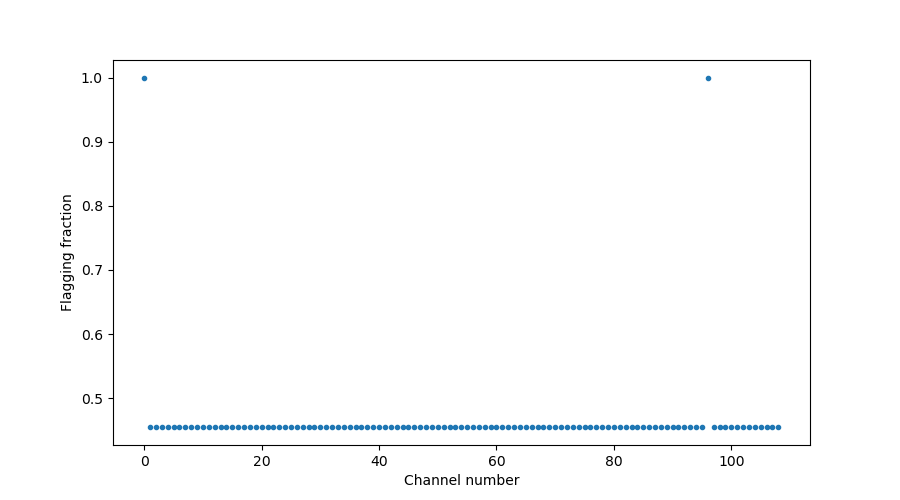

Text(0, 0.5, 'Flagging fraction')

In [264]:
fig = plt.figure(figsize=(9, 5))
for msf, frac in fracs[::len(fracs)]:
    plt.plot(range(109), frac, '.', label=msf.split('/')[-1])
plt.xlabel("Channel number")
plt.ylabel("Flagging fraction")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [265]:
for msf, frac in fracs:
    nch = len(np.where(np.array(frac) == 1.0)[0])
    print(msf, nch)

/lustre/mmanders/exoplanet/processing/msfiles/2020-01-17/hh=08/2020-01-17T08:08:34/07_2020-01-17T08:08:34.ms 2
/lustre/mmanders/exoplanet/processing/msfiles/2020-01-19/hh=08/2020-01-19T08:00:42/07_2020-01-19T08:00:42.ms 4
/lustre/mmanders/exoplanet/processing/msfiles/2020-01-21/hh=07/2020-01-21T07:52:50/07_2020-01-21T07:52:50.ms 3
/lustre/mmanders/exoplanet/processing/msfiles/2020-01-23/hh=07/2020-01-23T07:44:58/07_2020-01-23T07:44:58.ms 5
/lustre/mmanders/exoplanet/processing/msfiles/2020-01-25/hh=07/2020-01-25T07:37:06/07_2020-01-25T07:37:06.ms 1
/lustre/mmanders/exoplanet/processing/msfiles/2020-01-27/hh=07/2020-01-27T07:29:14/07_2020-01-27T07:29:14.ms 4
/lustre/mmanders/exoplanet/processing/msfiles/2020-01-29/hh=07/2020-01-29T07:21:22/07_2020-01-29T07:21:22.ms 2
/lustre/mmanders/exoplanet/processing/msfiles/2020-01-31/hh=07/2020-01-31T07:13:30/07_2020-01-31T07:13:30.ms 3
/lustre/mmanders/exoplanet/processing/msfiles/2020-02-02/hh=07/2020-02-02T07:05:38/07_2020-02-02T07:05:38.ms 2
/

### Flagging over antenna

Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol


<IPython.core.display.Javascript object>


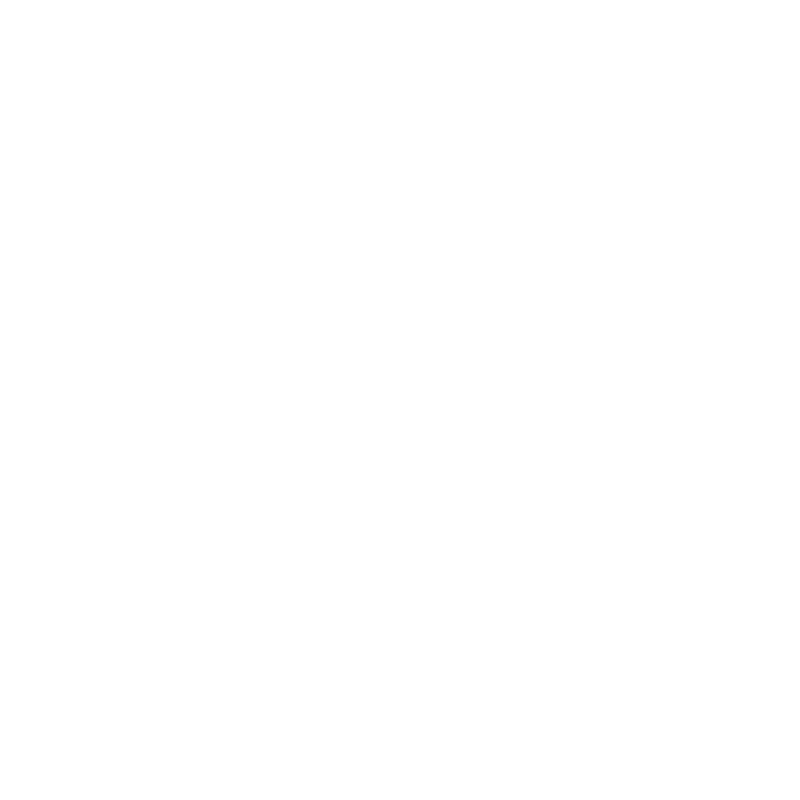

Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 2

<IPython.core.display.Javascript object>


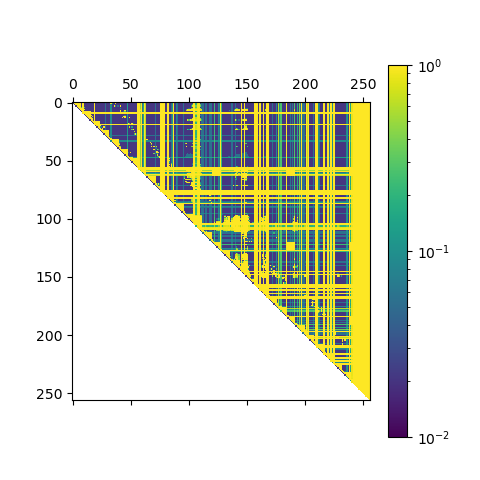

In [266]:
corrs = plots.corr_flagfrac(msfiles_list[0][0], showplot=False, saveplot=False)

fig = plt.figure(figsize=(8,8))
i = 1
for msfiles in msfiles_list[1:]:
    msfile = msfiles[0]
    corrs += plots.corr_flagfrac(msfile, showplot=False, saveplot=False)
    i += 1
corrs /= i
im = plt.matshow(corrs, norm=LogNorm(vmin=1.e-2, vmax=1))
plt.colorbar()

## Bandpass calibration

In [267]:
bps = []
snrs = []
snrm = []
for bpfile in bpfiles:
    tb.open(bpfile)
    bps.append(tb.getcol('CPARAM'))
    snr = tb.getcol('SNR')
    tb.close()
    snrs.append(snr)
    snrm.append(snr.mean(axis=2))
bpa = np.concatenate(bps, axis=1)
bpaa = np.abs(bpa)
snra = np.concatenate(snrs, axis=1)
snrm = np.array(snrm)
nspw, npol, nant = snrm.shape
npol, nch, nant = snr.shape

<IPython.core.display.Javascript object>


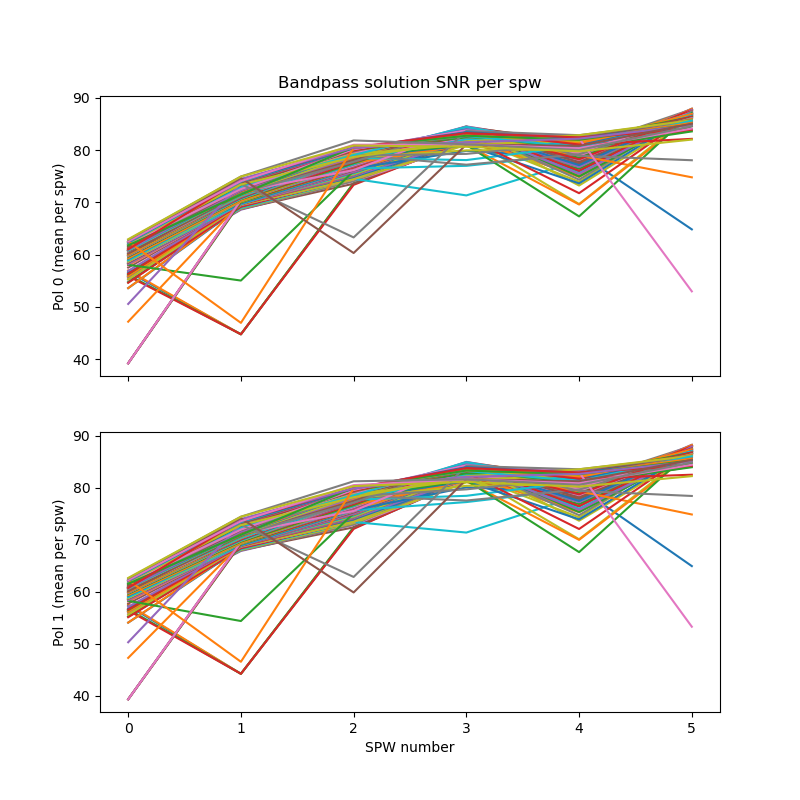

Text(0.5, 1.0, 'Bandpass solution SNR per spw')

In [268]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex=True, squeeze=True)
ax1.plot(snrm[:, 0])
ax1.set_ylabel('Pol 0 (mean per spw)')
ax2.plot(snrm[:, 1])
ax2.set_xlabel('SPW number')
ax2.set_ylabel('Pol 1 (mean per spw)')
ax1.set_title("Bandpass solution SNR per spw")

SPW 0 has 21 poor solutions
SPW 1 has 11 poor solutions
SPW 5 has 2 poor solutions
Pol 0 has 18 poor solutions
Pol 1 has 16 poor solutions
Ant 9 has 1 poor solutions
Ant 10 has 2 poor solutions
Ant 11 has 2 poor solutions
Ant 12 has 1 poor solutions
Ant 13 has 1 poor solutions
Ant 41 has 2 poor solutions
Ant 42 has 2 poor solutions
Ant 43 has 2 poor solutions
Ant 44 has 2 poor solutions
Ant 45 has 2 poor solutions
Ant 46 has 2 poor solutions
Ant 94 has 2 poor solutions
Ant 0 has 2 poor solutions
Ant 1 has 2 poor solutions
Ant 2 has 2 poor solutions
Ant 3 has 2 poor solutions
Ant 101 has 2 poor solutions
Ant 32 has 1 poor solutions
Ant 96 has 2 poor solutions


<IPython.core.display.Javascript object>


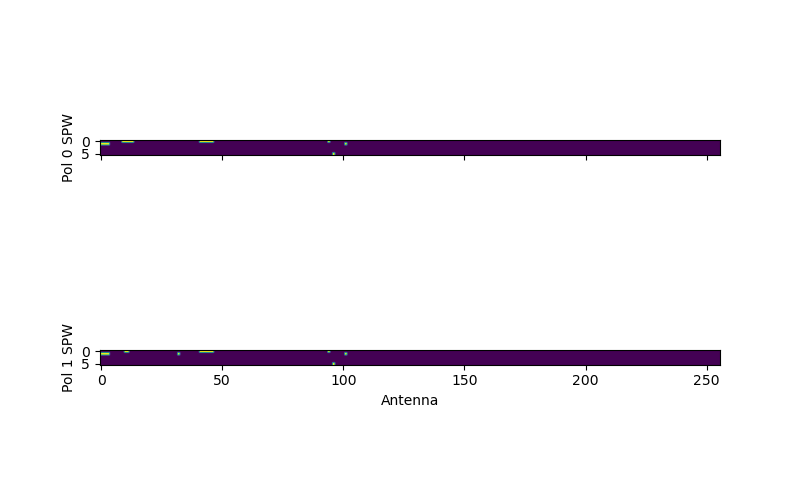

Text(0.5, 0, 'Antenna')

In [269]:
thresh = 0.7
wspw, wpol, want = np.where(snrm < thresh*np.median(snrm))
if len(wspw):
    for k, v in Counter(wspw).items():
        print(f'SPW {k} has {v} poor solutions')
if len(wpol):
    for k, v in Counter(wpol).items():
        print(f'Pol {k} has {v} poor solutions')
if len(want):
    for k, v in Counter(want).items():
        print(f'Ant {k} has {v} poor solutions')
        
bad = np.zeros(shape=(npol, nspw, nant), dtype=bool)
bad[wpol, wspw, want] = True

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,5), sharex='col')
ax1.imshow(bad[0])
ax1.set_ylabel("Pol 0 SPW")
ax2.imshow(bad[1])
ax2.set_ylabel("Pol 1 SPW")
ax2.set_xlabel("Antenna")

<IPython.core.display.Javascript object>


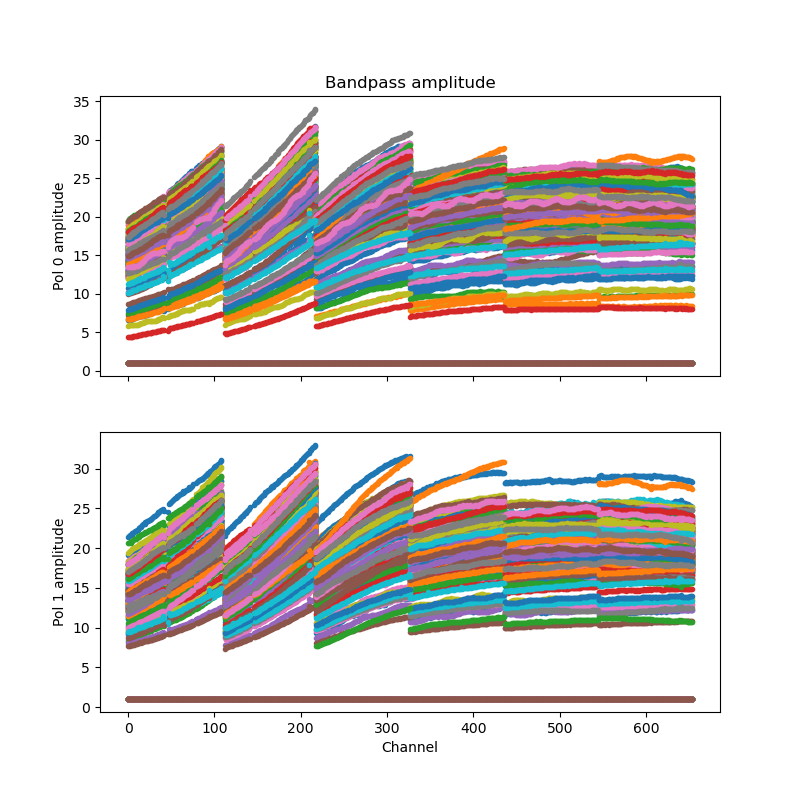

Text(0.5, 1.0, 'Bandpass amplitude')

In [270]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex=True, squeeze=True)
ax1.plot(bpaa[0, :, :], '.')
ax2.set_xlabel('Channel')
ax1.set_ylabel('Pol 0 amplitude')
ax2.plot(bpaa[1, :, :], '.')
ax2.set_ylabel('Pol 1 amplitude')
ax1.set_title("Bandpass amplitude")

Channel 0 has 142 poor solutions
Channel 1 has 142 poor solutions
Channel 2 has 142 poor solutions
Channel 3 has 142 poor solutions
Channel 4 has 142 poor solutions
Channel 5 has 142 poor solutions
Channel 6 has 142 poor solutions
Channel 7 has 142 poor solutions
Channel 8 has 142 poor solutions
Channel 9 has 142 poor solutions
Channel 10 has 142 poor solutions
Channel 11 has 142 poor solutions
Channel 12 has 142 poor solutions
Channel 13 has 142 poor solutions
Channel 14 has 142 poor solutions
Channel 15 has 142 poor solutions
Channel 16 has 142 poor solutions
Channel 17 has 142 poor solutions
Channel 18 has 142 poor solutions
Channel 19 has 142 poor solutions
Channel 20 has 142 poor solutions
Channel 21 has 142 poor solutions
Channel 22 has 142 poor solutions
Channel 23 has 142 poor solutions
Channel 24 has 142 poor solutions
Channel 25 has 142 poor solutions
Channel 26 has 142 poor solutions
Channel 27 has 142 poor solutions
Channel 28 has 142 poor solutions
Channel 29 has 142 poor 

<IPython.core.display.Javascript object>


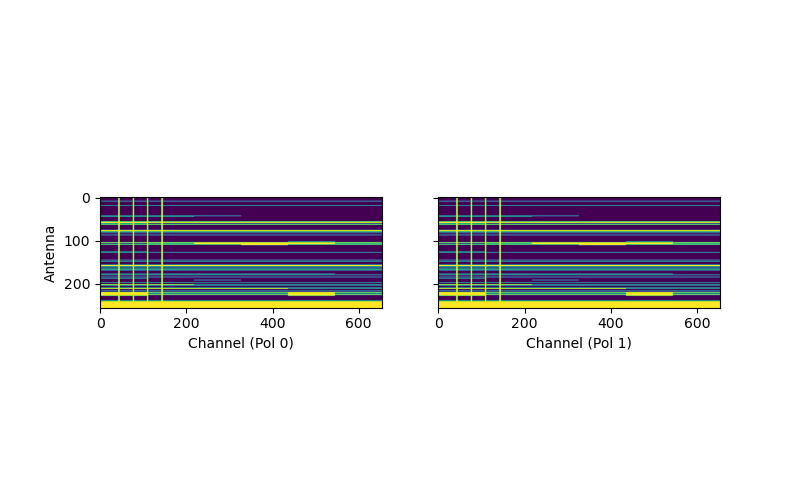

Text(0.5, 0, 'Channel (Pol 1)')

In [271]:
thresh = 0.1
wpol, wch, want = np.where(bpaa < thresh*np.median(bpaa))
if len(wch):
    for k, v in Counter(wch).items():
        print(f'Channel {k} has {v} poor solutions')
if len(want):
    for k, v in Counter(want).items():
        print(f'Ant {k} has {v} poor solutions')
if len(wpol):
    for k, v in Counter(wpol).items():
        print(f'Pol {k} has {v} poor solutions')

bad = np.zeros(shape=(npol, nant, nch*nspw), dtype=bool)
bad[wpol, want, wch] = True

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5), sharey='row')
ax1.imshow(bad[0])
ax1.set_ylabel("Antenna")
ax1.set_xlabel("Channel (Pol 0)")
ax2.imshow(bad[1])
ax2.set_xlabel("Channel (Pol 1)")

### Image analysis

In [272]:
stds = []
maxs = []
names = []
for fitsfiles in fitsfiles_list:
    print(f'Directory has {len(fitsfiles)} fits files like {fitsfiles[0]}')
    for fitsfile in fitsfiles[::100]:
        fd = fits.getdata(fitsfile)
        stds.append(fd.std())
        maxs.append(fd.max())
        names.append(fitsfile)

Directory has 1069 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-01-17/hh=08/2020-01-17T08:08:34/2020-01-17T08:08:34-dirty.fits
Directory has 1087 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-01-18/hh=08/2020-01-18T08:04:38/2020-01-18T08:04:38-dirty.fits
Directory has 1105 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-01-19/hh=08/2020-01-19T08:00:42/2020-01-19T08:00:42-dirty.fits
Directory has 1123 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-01-20/hh=07/2020-01-20T07:56:46/2020-01-20T07:56:46-dirty.fits
Directory has 1141 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-01-21/hh=07/2020-01-21T07:52:50/2020-01-21T07:52:50-dirty.fits
Directory has 1159 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-01-22/hh=07/2020-01-22T07:48:54/2020-01-22T07:48:54-dirty.fits
Directory has 1178 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-01-23/hh=07/2020-01-

<IPython.core.display.Javascript object>


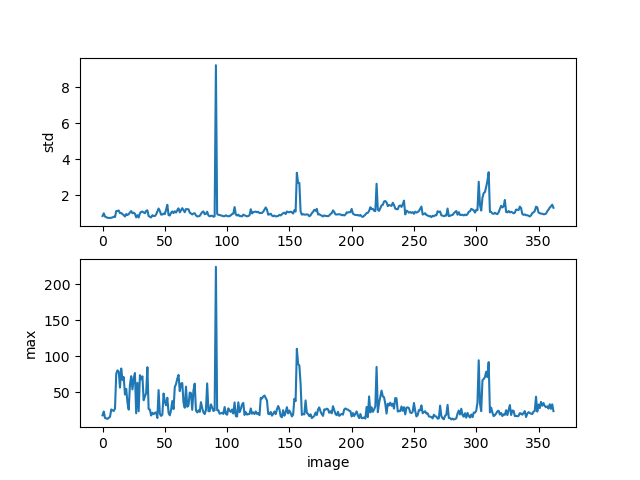

Text(0, 0.5, 'max')

In [273]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(stds)
ax1.set_ylabel('std')
ax2.plot(maxs)
ax2.set_xlabel('image')
ax2.set_ylabel('max')

In [274]:
TOOLS = ["box_select", "hover", "reset", "pan"]
TOOLTIPS = [('std', '@std'), ('max', '@max'), ('image', '@name')]
source = dict(std=stds, max=maxs, name=[name.split('/')[-1] for name in names])
p1 = figure(plot_width=800, plot_height=400, tools=TOOLS, tooltips=TOOLTIPS)
p1.circle(source=source, x='std', y='max')
show(p1, notebook_handle=True)

## Second 2020 campaign

In [275]:
pm_20200219 = pathsmanagers.OfflinePathsManager(utc_times_txt_path='/lustre/data/exoplanet_20200219/utc_times.txt',
                                                dadafile_dir='/lustre/data/exoplanet_20200219',
                                                working_dir=f'/lustre/{user}/exoplanet/processing',
                                                gaintable_dir=f'/lustre/{user}/exoplanet/processing/BCAL')
yymmdd = list(zip([20]*(27-19+1), [2]*(27-19+1), range(19, 27)))  # did some of this move?
print(f"{len(yymmdd)} days: \n {yymmdd}")

8 days: 
 [(20, 2, 19), (20, 2, 20), (20, 2, 21), (20, 2, 22), (20, 2, 23), (20, 2, 24), (20, 2, 25), (20, 2, 26)]


In [276]:
msfiles_list = []
bpfiles_list = []
fitsfiles_list = []
for yy, mm, dd in yymmdd:
    start = datetime(2000 + int(yy), int(mm), int(dd), lst0_quiet, 0, 0)
    end = datetime(2000 + int(yy), int(mm), int(dd), lst1_quiet, 0, 0)
    print(f'start: {start}, end: {end}')
    pm = pm_20200219.time_filter(start_time=start, end_time=end)
    bpfiles = []
    msfiles = []
    fitsfiles = []
    for s in spws:
        bpf = pm.get_gaintable_path(date(2020, mm, dd), f'{s:02d}', 'bcal')
        if os.path.exists(bpf):
            bpfiles.append(bpf)
    for t in pm.utc_times_mapping.keys():
        msf = pm.get_ms_path(t, f'{s:02d}')
        if os.path.exists(msf):
            msfiles.append(msf)
            fitsfiles.append(pm.get_data_product_path(t, 'msfiles',
                                                      '/' + str(t).replace(' ', 'T') + '-dirty.fits',
                                                      file_prefix=None))
    if len(msfiles):
        msfiles_list.append(msfiles)
    if len(bpfiles):
        bpfiles_list.append(bpfiles)
    if len(fitsfiles):
        fitsfiles_list.append(fitsfiles)

start: 2020-02-19 07:00:00, end: 2020-02-19 12:00:00
start: 2020-02-20 07:00:00, end: 2020-02-20 12:00:00
start: 2020-02-21 07:00:00, end: 2020-02-21 12:00:00
start: 2020-02-22 07:00:00, end: 2020-02-22 12:00:00
start: 2020-02-23 07:00:00, end: 2020-02-23 12:00:00
start: 2020-02-24 07:00:00, end: 2020-02-24 12:00:00
start: 2020-02-25 07:00:00, end: 2020-02-25 12:00:00
start: 2020-02-26 07:00:00, end: 2020-02-26 12:00:00


In [277]:
print(f"{reduce(lambda count, l: count + len(l), msfiles_list, 0)} msfiles in {len(msfiles_list)} days")
print("First and last MS data files:")
print([msf.split('/')[-1] for msf in [msfiles_list[0][0], msfiles_list[-1][-1]]])

print(f"{reduce(lambda count, l: count + len(l), bpfiles_list, 0)} bpfiles in {len(bpfiles_list)} days")
print(['/'.join(bpf.split('/')[-2:]) for bpfiles in bpfiles_list for bpf in bpfiles])

7165 msfiles in 7 days
First and last MS data files:
['07_2020-02-20T07:00:13.ms', '07_2020-02-26T10:29:51.ms']
42 bpfiles in 7 days
['2020-02-20/02.bcal', '2020-02-20/03.bcal', '2020-02-20/04.bcal', '2020-02-20/05.bcal', '2020-02-20/06.bcal', '2020-02-20/07.bcal', '2020-02-21/02.bcal', '2020-02-21/03.bcal', '2020-02-21/04.bcal', '2020-02-21/05.bcal', '2020-02-21/06.bcal', '2020-02-21/07.bcal', '2020-02-22/02.bcal', '2020-02-22/03.bcal', '2020-02-22/04.bcal', '2020-02-22/05.bcal', '2020-02-22/06.bcal', '2020-02-22/07.bcal', '2020-02-23/02.bcal', '2020-02-23/03.bcal', '2020-02-23/04.bcal', '2020-02-23/05.bcal', '2020-02-23/06.bcal', '2020-02-23/07.bcal', '2020-02-24/02.bcal', '2020-02-24/03.bcal', '2020-02-24/04.bcal', '2020-02-24/05.bcal', '2020-02-24/06.bcal', '2020-02-24/07.bcal', '2020-02-25/02.bcal', '2020-02-25/03.bcal', '2020-02-25/04.bcal', '2020-02-25/05.bcal', '2020-02-25/06.bcal', '2020-02-25/07.bcal', '2020-02-26/02.bcal', '2020-02-26/03.bcal', '2020-02-26/04.bcal', '2020-02

In [278]:
# Plot some fraction of all ms data files
fracs = [(msf, metrics.flagfrac_chans(msf)) for (msf, *_) in msfiles_list]

Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol


<IPython.core.display.Javascript object>


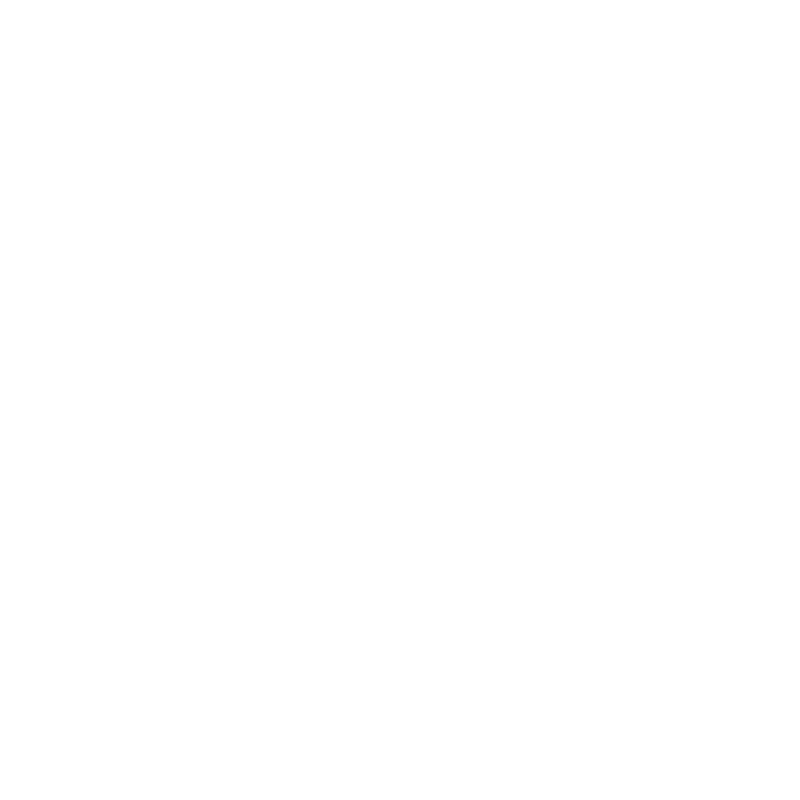

Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol
Data shape: 32896 bls, 256 ants, 109 chans/spw, 1 spw, 4 pol


<IPython.core.display.Javascript object>


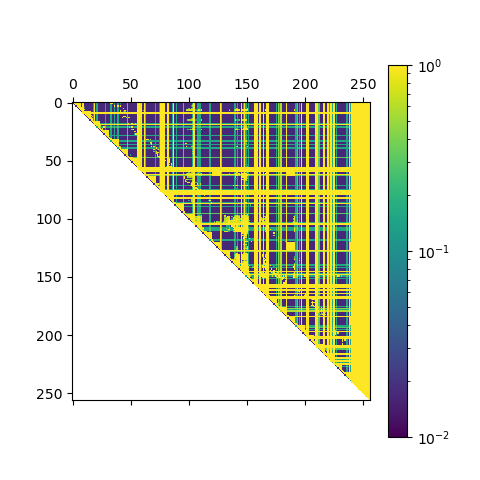

In [279]:
corrs = plots.corr_flagfrac(msfiles_list[0][0], showplot=False, saveplot=False)

fig = plt.figure(figsize=(8,8))
i = 1
for msfiles in msfiles_list[1:]:
    msfile = msfiles[0]
    corrs += plots.corr_flagfrac(msfile, showplot=False, saveplot=False)
    i += 1
corrs /= i
im = plt.matshow(corrs, norm=LogNorm(vmin=1.e-2, vmax=1))
plt.colorbar()

In [280]:
bps = []
snrs = []
snrm = []
for bpfile in bpfiles:
    tb.open(bpfile)
    bps.append(tb.getcol('CPARAM'))
    snr = tb.getcol('SNR')
    tb.close()
    snrs.append(snr)
    snrm.append(snr.mean(axis=2))
bpa = np.concatenate(bps, axis=1)
bpaa = np.abs(bpa)
snra = np.concatenate(snrs, axis=1)
snrm = np.array(snrm)
nspw, npol, nant = snrm.shape
npol, nch, nant = snr.shape

<IPython.core.display.Javascript object>


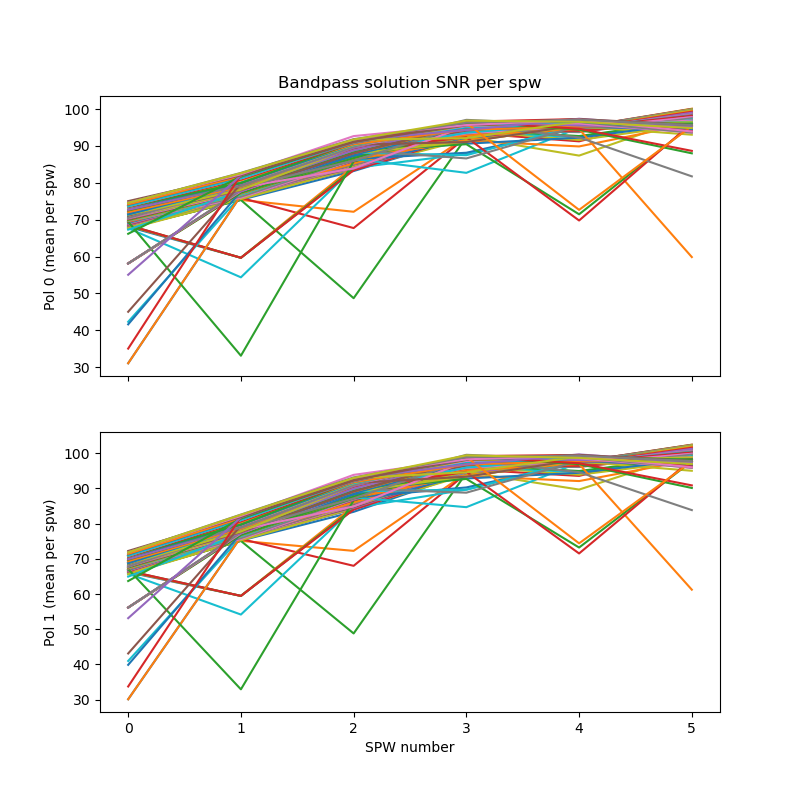

Text(0.5, 1.0, 'Bandpass solution SNR per spw')

In [281]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex=True, squeeze=True)
ax1.plot(snrm[:, 0])
ax1.set_ylabel('Pol 0 (mean per spw)')
ax2.plot(snrm[:, 1])
ax2.set_xlabel('SPW number')
ax2.set_ylabel('Pol 1 (mean per spw)')
ax1.set_title("Bandpass solution SNR per spw")

SPW 0 has 29 poor solutions
SPW 1 has 12 poor solutions
SPW 2 has 2 poor solutions
SPW 5 has 2 poor solutions
Pol 0 has 22 poor solutions
Pol 1 has 23 poor solutions
Ant 19 has 2 poor solutions
Ant 20 has 2 poor solutions
Ant 21 has 2 poor solutions
Ant 50 has 2 poor solutions
Ant 51 has 2 poor solutions
Ant 52 has 2 poor solutions
Ant 53 has 2 poor solutions
Ant 54 has 2 poor solutions
Ant 55 has 2 poor solutions
Ant 56 has 2 poor solutions
Ant 57 has 2 poor solutions
Ant 85 has 2 poor solutions
Ant 103 has 2 poor solutions
Ant 104 has 2 poor solutions
Ant 102 has 1 poor solutions
Ant 9 has 2 poor solutions
Ant 10 has 2 poor solutions
Ant 11 has 2 poor solutions
Ant 12 has 2 poor solutions
Ant 13 has 2 poor solutions
Ant 32 has 2 poor solutions
Ant 2 has 2 poor solutions
Ant 61 has 2 poor solutions


<IPython.core.display.Javascript object>


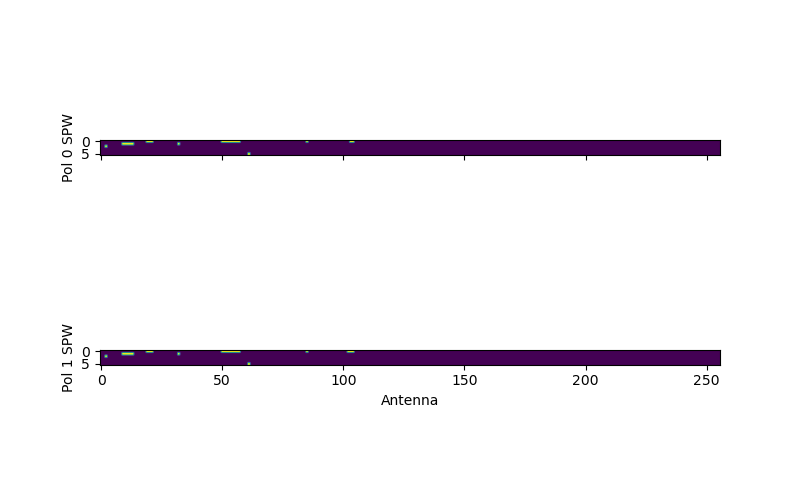

Text(0.5, 0, 'Antenna')

In [282]:
thresh = 0.7
wspw, wpol, want = np.where(snrm < thresh*np.median(snrm))
if len(wspw):
    for k, v in Counter(wspw).items():
        print(f'SPW {k} has {v} poor solutions')
if len(wpol):
    for k, v in Counter(wpol).items():
        print(f'Pol {k} has {v} poor solutions')
if len(want):
    for k, v in Counter(want).items():
        print(f'Ant {k} has {v} poor solutions')
        
bad = np.zeros(shape=(npol, nspw, nant), dtype=bool)
bad[wpol, wspw, want] = True

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,5), sharex='col')
ax1.imshow(bad[0])
ax1.set_ylabel("Pol 0 SPW")
ax2.imshow(bad[1])
ax2.set_ylabel("Pol 1 SPW")
ax2.set_xlabel("Antenna")

<IPython.core.display.Javascript object>


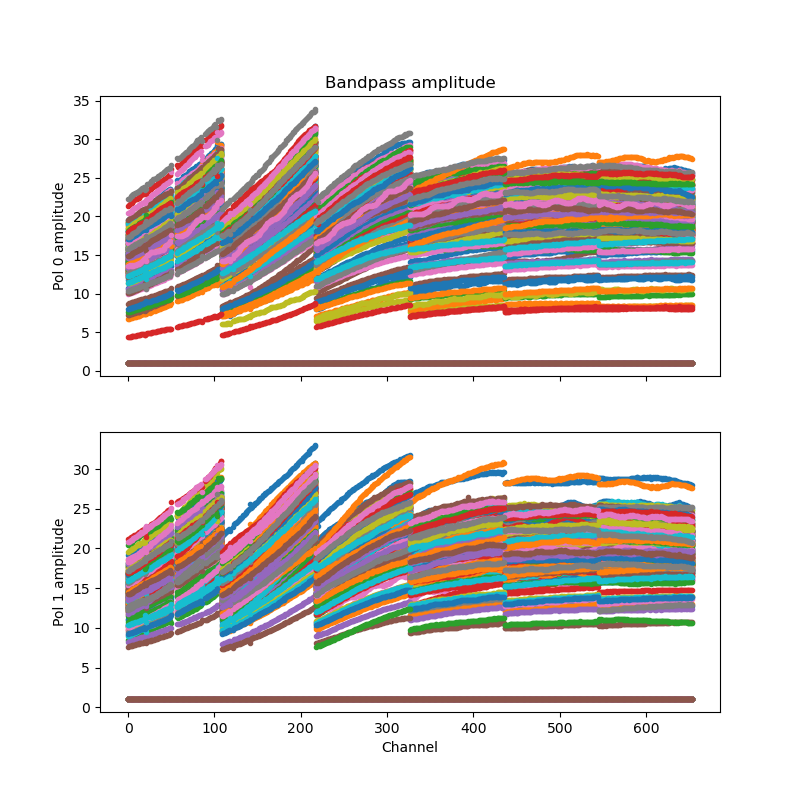

Text(0.5, 1.0, 'Bandpass amplitude')

In [283]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex=True, squeeze=True)
ax1.plot(bpaa[0, :, :], '.')
ax2.set_xlabel('Channel')
ax1.set_ylabel('Pol 0 amplitude')
ax2.plot(bpaa[1, :, :], '.')
ax2.set_ylabel('Pol 1 amplitude')
ax1.set_title("Bandpass amplitude")

Channel 0 has 134 poor solutions
Channel 1 has 134 poor solutions
Channel 2 has 134 poor solutions
Channel 3 has 134 poor solutions
Channel 4 has 134 poor solutions
Channel 5 has 134 poor solutions
Channel 6 has 134 poor solutions
Channel 7 has 134 poor solutions
Channel 8 has 134 poor solutions
Channel 9 has 134 poor solutions
Channel 10 has 134 poor solutions
Channel 11 has 134 poor solutions
Channel 12 has 134 poor solutions
Channel 13 has 134 poor solutions
Channel 14 has 134 poor solutions
Channel 15 has 134 poor solutions
Channel 16 has 134 poor solutions
Channel 17 has 134 poor solutions
Channel 18 has 134 poor solutions
Channel 19 has 134 poor solutions
Channel 20 has 134 poor solutions
Channel 21 has 134 poor solutions
Channel 22 has 134 poor solutions
Channel 23 has 134 poor solutions
Channel 24 has 134 poor solutions
Channel 25 has 134 poor solutions
Channel 26 has 134 poor solutions
Channel 27 has 134 poor solutions
Channel 28 has 134 poor solutions
Channel 29 has 134 poor 

<IPython.core.display.Javascript object>


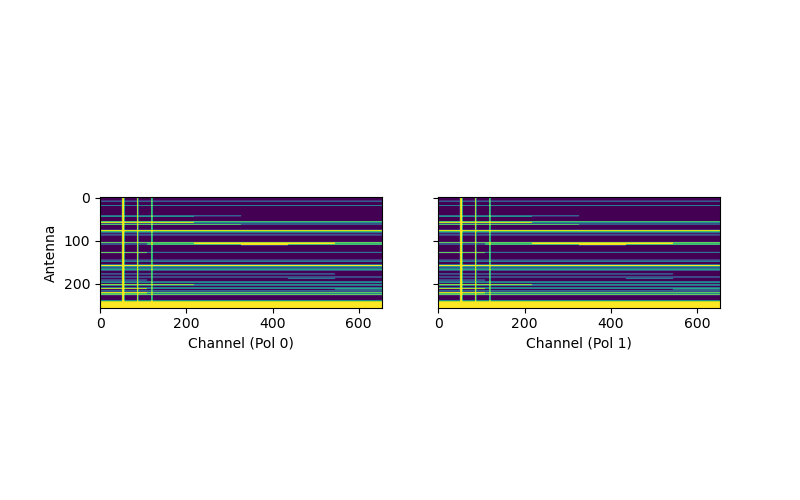

Text(0.5, 0, 'Channel (Pol 1)')

In [284]:
thresh = 0.1
wpol, wch, want = np.where(bpaa < thresh*np.median(bpaa))
if len(wch):
    for k, v in Counter(wch).items():
        print(f'Channel {k} has {v} poor solutions')
if len(want):
    for k, v in Counter(want).items():
        print(f'Ant {k} has {v} poor solutions')
if len(wpol):
    for k, v in Counter(wpol).items():
        print(f'Pol {k} has {v} poor solutions')

bad = np.zeros(shape=(npol, nant, nch*nspw), dtype=bool)
bad[wpol, want, wch] = True

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5), sharey='row')
ax1.imshow(bad[0])
ax1.set_ylabel("Antenna")
ax1.set_xlabel("Channel (Pol 0)")
ax2.imshow(bad[1])
ax2.set_xlabel("Channel (Pol 1)")

In [285]:
stds = []
maxs = []
names = []
for fitsfiles in fitsfiles_list:
    print(f'Directory has {len(fitsfiles)} fits files like {fitsfiles[0]}')
    for fitsfile in fitsfiles[::100]:
        fd = fits.getdata(fitsfile)
        stds.append(fd.std())
        maxs.append(fd.max())
        names.append(fitsfile)

Directory has 1078 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-02-20/hh=07/2020-02-20T07:00:13/2020-02-20T07:00:13-dirty.fits
Directory has 1060 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-02-21/hh=07/2020-02-21T07:00:11/2020-02-21T07:00:11-dirty.fits
Directory has 1043 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-02-22/hh=07/2020-02-22T07:00:02/2020-02-22T07:00:02-dirty.fits
Directory has 1023 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-02-23/hh=07/2020-02-23T07:00:13/2020-02-23T07:00:13-dirty.fits
Directory has 1005 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-02-24/hh=07/2020-02-24T07:00:11/2020-02-24T07:00:11-dirty.fits
Directory has 987 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-02-25/hh=07/2020-02-25T07:00:09/2020-02-25T07:00:09-dirty.fits
Directory has 969 fits files like /lustre/mmanders/exoplanet/processing/msfiles/2020-02-26/hh=07/2020-02-26

<IPython.core.display.Javascript object>


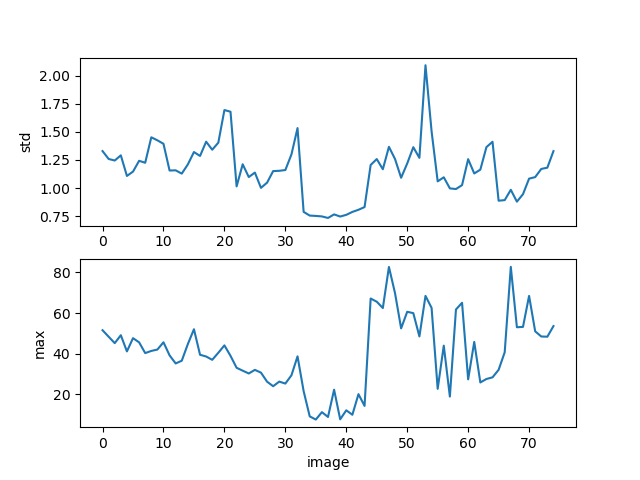

Text(0, 0.5, 'max')

In [286]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(stds)
ax1.set_ylabel('std')
ax2.plot(maxs)
ax2.set_xlabel('image')
ax2.set_ylabel('max')

In [287]:
TOOLS = ["box_select", "hover", "reset", "pan"]
TOOLTIPS = [('std', '@std'), ('max', '@max'), ('image', '@name')]
source = dict(std=stds, max=maxs, name=[name.split('/')[-1] for name in names])
p1 = figure(plot_width=800, plot_height=400, tools=TOOLS, tooltips=TOOLTIPS)
p1.circle(source=source, x='std', y='max')
show(p1, notebook_handle=True)